## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Data Introduction](#1_Data_intorduction)
  * [1.1 Objectives](#1.4_Objectives)
    * [1.1.1 Key Questions](#1.3_Imports)
  * [1.2 Product Dataset](#1.1_Product_Information)
 * [1.7 Summary](#1.7_Summary)

# 1. Data Introduction<a id='1_Data_Introduction'></a>

Sunlight Ski and Bike, a small store in Glenwood Springs, relies on sales representatives' suggestions for seasonal orders, leading to inefficient inventory management and buying due to:
* Lack of understanding of product inventory and demand.
* Unclear product categories: prioritizing or eliminating categories.
* Difficulty identifying high-demand, high-value items.
* Missed opportunities for cross-selling.

This results in:
* Stockouts for in-demand products.
* Overstocking on slow-moving items.
* Lost revenue and customer satisfaction.

## Objectives<a id='1.1_Objectives'></a>

After exploring the historic sales and product data, it was decided that the "category" of the products needed some cleaning up in order to get better reporting on which items, colors, sizes sell the best, by which prices, discounts etc. Therefore in order to gain an understanding of how to <b>optimize product inventory and sales to maximize profitability and customer satisfaction</b>, the categories (like skis, bikes, bike parts, etc) need to be reclassified, reviewed, and fixed. Once, the categories and parent categories are correctly classified then we can look at questions like:
Specific questions:
* Which products sell the best and the quickest? Which brands?  
* Which products, sizes, colors sells the most with no discounts, or full MSRP price?

And further doesn the road, we can look at:
* Which factors influence sales patterns (e.g., seasonality, promotions, external events)?
* How can we accurately predict future demand for specific products or categories?
* How can we personalize product recommendations to individual customers?

In [5]:
#import libraries
import os
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  

## 1. 1 Product Datasets<a id='#1.1_Product_Information'></a>

Let's look at the products dataset and explore/clean up the category information to get a better understanding of the types of products.

A little information about this dataset--

**Identifiers and Codes:**
ID (object): A unique identifier for each product, usually a numerical or alphanumeric code.
SKU (Stock Keeping Unit, object): A unique code used for inventory tracking and identification.
UPC (Universal Product Code, object): A barcode used for scanning and tracking products globally.
MPN (Manufacturer Part Number, object): A unique code assigned by the manufacturer to identify a specific product.
VPN (Vendor Part Number, object): A code assigned by the vendor to identify a product within their catalog.

**Product Information:**
Category (object): The category or subcategory where the product belongs.
Description (object): A detailed description of the product's features and specifications.
Keyword (object): Keywords or tags associated with the product, used for search and filtering.
EstimatedCost (float64): The estimated cost of the product to the retailer.
MSRP (Manufacturer's Suggested Retail Price, float64): The suggested retail price set by the manufacturer.

**Inventory Management:**
Quantity (int64): The current quantity of the product in stock.
Min (int64): The minimum quantity to keep in stock.
Min2 (int64): A secondary minimum quantity threshold.
Max (int64): The maximum quantity to hold in stock.
Max2 (int64): A secondary maximum quantity threshold.
IsNonInventory (bool): Indicates whether the product is a non-inventory item (not physically stocked).

**Product Attributes:**
Brand (object): The brand or manufacturer of the product.
Color (object): The color of the product.
Size (object): The size of the product, if applicable.
Location (object): The physical location where the product is stored (likely has limited use with only 2 non-null values).
Other (object): Any other relevant product attributes.
StyleNumber (object): A style number assigned by the manufacturer or vendor.
StyleName (object): A descriptive name for the product's style.
Year (object): The year the product was released or manufactured.
Gender (object): The target gender for the product.
Season (object): The season for which the product is intended (e.g., spring, summer).

**Sales and Pricing:**
Commission (float64): The commission rate earned on the sale of the product.
IsDollarCommission (bool): Indicates whether the commission is a fixed dollar amount or a percentage.
NoLabel (bool): Indicates whether the product is sold without a label.
EstimatedTime (int64): The estimated time it takes to process and ship the product.
eCommerce (bool): Indicates whether the product is available for sale online.

In [6]:
# Load datasets
product_excel = "../data/raw/In-Store_Products_202401021512.xlsx" 

# Read the Excel file into a DataFrame
products = pd.read_excel(product_excel)

# Optionally, view the first few rows of the DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121355 entries, 0 to 121354
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  121355 non-null  object 
 1   SKU                 121355 non-null  object 
 2   UPC                 118752 non-null  object 
 3   MPN                 19424 non-null   object 
 4   VPN                 116916 non-null  object 
 5   Category            21396 non-null   object 
 6   Description         121355 non-null  object 
 7   Keyword             120677 non-null  object 
 8   EstimatedCost       121355 non-null  float64
 9   MSRP                121355 non-null  float64
 10  Quantity            121355 non-null  int64  
 11  Min                 121355 non-null  int64  
 12  Min2                121355 non-null  int64  
 13  Max                 121355 non-null  int64  
 14  Max2                121355 non-null  int64  
 15  IsNonInventory      121355 non-nul

Here are all of the columns mentioned above and which type of datatype they are. It looks like we will need to convert some columns, like category, size, and color to categories. 

But first I will create a new column, called "ParentCategory", which will be an aggreagate of the category type of product the item is. This column is important for reporting and classifying products. 

In [7]:
# products.dropna(subset=['Category'])
products['Category'] = products['Category'].astype(str)

# Create an empty list to store the parent categories
parent_categories = []
for category in products['Category']:
    parts = category.split("-", 1)
    parent_category = parts[0] if len(parts) > 1 else category  # Use original if no "-"
    if parent_category == 'X':
        parent_category = 'Cross Country'
    parent_categories.append(parent_category)
    

# Add the new parent category to the DataFrame
products['ParentCategory'] = parent_categories

print(products['ParentCategory'].nunique, products['Category'].nunique)

<bound method IndexOpsMixin.nunique of 0                    nan
1                    nan
2              Clothing 
3                    nan
4         Ski Hardgoods 
               ...      
121350               nan
121351               nan
121352               nan
121353               nan
121354               nan
Name: ParentCategory, Length: 121355, dtype: object> <bound method IndexOpsMixin.nunique of 0                          nan
1                          nan
2             Clothing - Socks
3                          nan
4         Ski Hardgoods - Skis
                  ...         
121350                     nan
121351                     nan
121352                     nan
121353                     nan
121354                     nan
Name: Category, Length: 121355, dtype: object>


In [8]:
products['Category'] = products['Category'].astype('category')
products['Color'] = products['Color'].astype('category')
products['Size'] = products['Size'].astype('category')
products['Description'] = products['Description'].astype('string')
products['Keyword'] = products['Keyword'].astype('string')
products['UPC'] = products['UPC'].astype('string')
products['ParentCategory'] = products['ParentCategory'].astype('category')
products['StyleName'] = products['StyleName'].astype('string')
products['Brand'] = products['Brand'].astype('category')
products['Keyword'] = products['Brand'].astype('string')
print(products['Category'].dtype)

category


Now that I have created an aggregated category column and converted the columns I want to categories and strings, I will grab only the columns that I think are important to keep in a new dataframe. I will use this dataframe to clean up the rows a bit more. 

In [9]:
clean_products = products[["Category", "Brand","Description","Keyword","UPC","MSRP","Quantity","SKU","Color","Size",
"StyleNumber", "StyleName", "ParentCategory"]]

In [10]:
categories = clean_products["Category"].unique
clean_products.head()

,Category,Brand,Description,Keyword,UPC,MSRP,Quantity,SKU,Color,Size,StyleNumber,StyleName,ParentCategory
0,nan,Fox Head,2024 SP - YTH V3 SOLID HELMET MT WHT,Fox Head,191972848216,349.95,0,20227727906T,NaN,YL,NaN,<NA>,nan
1,nan,Nordica,MENS UNLEASHED 114 ICE RED BLACK BLUE 174,Nordica,888341994123,899.99,0,MEN344653574,RED - BLACK - BLUE,174,0A359500001,UNLEASHED 114 - ICE,nan
2,Clothing - Socks,BONTRAGER,SOCK BONTRAGER RACE NO SHOW MEDIUM 40-42 WHITE...,BONTRAGER,768682264942,24.99,0,430769,NaN,NaN,NaN,<NA>,Clothing
3,nan,Fox Head,2024 SP - RANGER SS JERSEY SG BLK,Fox Head,191972877322,54.95,0,20225630587K,NaN,XL,NaN,<NA>,nan
4,Ski Hardgoods - Skis,Armada,Armada - ARV 88 Ski - 161cm,Armada,842339221875,549.95,1,ARM113048288,NaN,NaN,NaN,<NA>,Ski Hardgoods


In [11]:
clean_products.tail()

,Category,Brand,Description,Keyword,UPC,MSRP,Quantity,SKU,Color,Size,StyleNumber,StyleName,ParentCategory
121350,nan,NaN,ANTHEM 85 MV 25.5,<NA>,196222133913,600.00,0,ANT139902685,NaN,25.5,NaN,ANTHEM 85 MV,nan
121351,nan,Fox Head,2024 SP - 180 NITRO PANT - EXTD SIZES BLK/GRY,Fox Head,191972820519,129.95,0,20233843019Y,NaN,34,NaN,<NA>,nan
121352,nan,Obermeyer,Celestia Jacket Carbon 16,Obermeyer,888555766325,299.00,0,CEL223639096,Carbon,16,11208,Celestia Jacket,nan
121353,nan,Fox Head,2016 SP - DEMO LS COMMENCAL LE JERSEY GRY CHAR,Fox Head,884065409998,64.95,0,20136236187R,NaN,M,NaN,<NA>,nan
121354,nan,Fox Head,2018 SP - FLEXAIR PREEST LE PANT FOR GRN,Fox Head,884065926914,229.95,0,20131174105N,NaN,38,NaN,<NA>,nan


It appears that there are a roughly 121,355 entries of the vendor products. This does not show what we have in inventory. This is a complete list of all of the product that we stock. 


And it looks like there are no duplicated products: 

In [12]:
clean_products.duplicated().sum()

0

In [13]:
clean_products.isnull().sum()

Category              0
Brand             18720
Description           0
Keyword           18720
UPC                2603
MSRP                  0
Quantity              0
SKU                   0
Color             42307
Size              12889
StyleNumber       64232
StyleName         48583
ParentCategory        0
dtype: int64

There are a significant amount of StyleNumbers, Size and Colors that are missing. That is okay because some of the products may not have an important color, size, or necessary styleNumber. 

In [14]:
clean_products.nunique()

Category             270
Brand                640
Description        95552
Keyword              640
UPC               118736
MSRP                1194
Quantity              92
SKU               121354
Color               6586
Size                1963
StyleNumber         7915
StyleName           8507
ParentCategory        31
dtype: int64

In [15]:
clean_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121355 entries, 0 to 121354
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Category        121355 non-null  category
 1   Brand           102635 non-null  category
 2   Description     121355 non-null  string  
 3   Keyword         102635 non-null  string  
 4   UPC             118752 non-null  string  
 5   MSRP            121355 non-null  float64 
 6   Quantity        121355 non-null  int64   
 7   SKU             121355 non-null  object  
 8   Color           79048 non-null   category
 9   Size            108466 non-null  category
 10  StyleNumber     57123 non-null   object  
 11  StyleName       72772 non-null   string  
 12  ParentCategory  121355 non-null  category
dtypes: category(5), float64(1), int64(1), object(2), string(4)
memory usage: 8.9+ MB


In [16]:
#lets look at the category column as a way to get insight on the products
unique_counts = clean_products['Category'].unique()
print(unique_counts)
# clean_products['Category'].nunique()

print(clean_products['Description'].nunique())

['nan', 'Clothing - Socks', 'Ski Hardgoods - Skis', 'Accessories - Summer - Clothing - Gloves ', 'Clothing - Winter - Outerwear', ..., 'Bikes - Electric - Womens', 'Accessories - Summer - Storage', 'Bikes - Trailer Bike', 'Clothing', 'Rental']
Length: 270
Categories (270, object): ['Acccessories - Winter - Beanies', 'Accessories - Summer', 'Accessories - Summer - Bags', 'Accessories - Summer - Baskets', ..., 'X-Country Hardgoods - Boots', 'X-Country Hardgoods - Poles', 'X-Country Hardgoods - Skis', 'nan']
95552


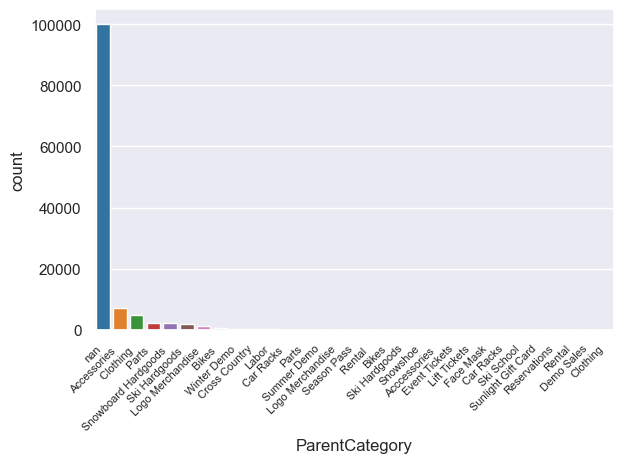

In [17]:
# Create the countplot, sorting bars by count
bar_plot = sns.countplot(
    x='ParentCategory', data=clean_products, palette='tab10', order=clean_products['ParentCategory'].value_counts().index
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

# Reduce label font size
plt.tick_params(axis='x', labelsize=8)  # Adjust font size as needed

# Improve spacing and visual clarity
plt.tight_layout()

plt.show()

There are so many 'nan' categorized products that I am unable to understand the distribution of products. Because most of the "nan" categorized products are old or were not purchased (sometimes we put products in the system that we never buy), I have decided to remove them. 

In [18]:
clean_products["ParentCategory"] = clean_products["ParentCategory"].astype("str")
clean_products["ParentCategory"] = clean_products["ParentCategory"].replace(["nan", "", "N/A", "<NA>"], pd.NA)

dropped_products = clean_products.loc[~clean_products.index.isin(clean_products.dropna(subset=["ParentCategory"]).index)]
print(dropped_products.head())

  Category     Brand                                        Description  \
0      nan  Fox Head               2024 SP - YTH V3 SOLID HELMET MT WHT   
1      nan   Nordica          MENS UNLEASHED 114 ICE RED BLACK BLUE 174   
3      nan  Fox Head                  2024 SP - RANGER SS JERSEY SG BLK   
5      nan    Burton  Boys Boys' Burton Barnone Jacket Mtn Camo / Re...   
7      nan       NaN                                  Foxy Bib Quartz S   

    Keyword           UPC    MSRP  Quantity           SKU               Color  \
0  Fox Head  191972848216  349.95         0  20227727906T                 NaN   
1   Nordica  888341994123  899.99         0  MEN344653574  RED - BLACK - BLUE   
3  Fox Head  191972877322   54.95         0  20225630587K                 NaN   
5    Burton  190450277968  149.95         0  BOY40647972S    Mtn Camo / Resin   
7      <NA>  605235862425  430.00         0   FOX1482959S              Quartz   

  Size  StyleNumber                    StyleName ParentCategor

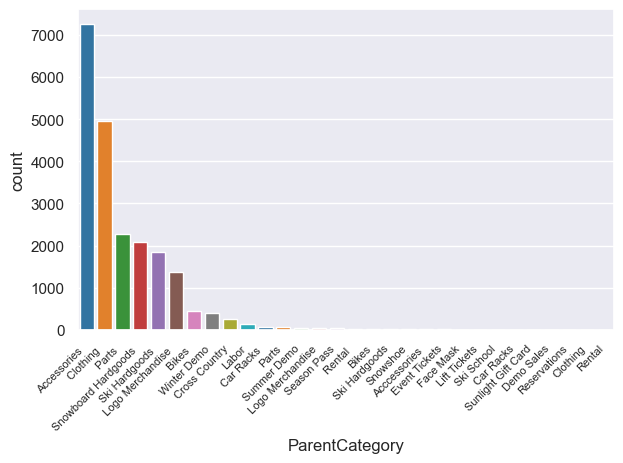

In [19]:
df_products = clean_products.dropna(subset=["ParentCategory"])

# Create the countplot, sorting bars by count
bar_plot = sns.countplot(
    x='ParentCategory', data=df_products, palette='tab10', order=df_products['ParentCategory'].value_counts().index
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

# Reduce label font size
plt.tick_params(axis='x', labelsize=8)  # Adjust font size as needed

# Improve spacing and visual clarity
plt.tight_layout()

plt.show()

There are some categories that I need a little bit more cleanup. I see that there are two "Logo Merchandise" categories listed. I will have to examine those and clean them.

I also see that there is a "Rental" category, which is a different than the others. I will take a peek at that one a little bit more. 

In [23]:
products.loc[products["ParentCategory"] == "Rental"]

,ID,SKU,UPC,MPN,VPN,Category,Description,Keyword,EstimatedCost,MSRP,...,StyleName,Year,Gender,Season,Commission,IsDollarCommission,NoLabel,EstimatedTime,eCommerce,ParentCategory
113330,{027C9E15-5950-4310-88CF-EF1458CAD6CE},REN1867868R,<NA>,NaN,REN1867868R,Rental,RENTAL HELMET WINTER - DAILY,<NA>,0.0,10.0,...,<NA>,NaN,NaN,NaN,0.0,False,True,0,True,Rental


Hmm. Rental Winter Helment. We don't use this system to sell those anymore, so I will drop that row. 

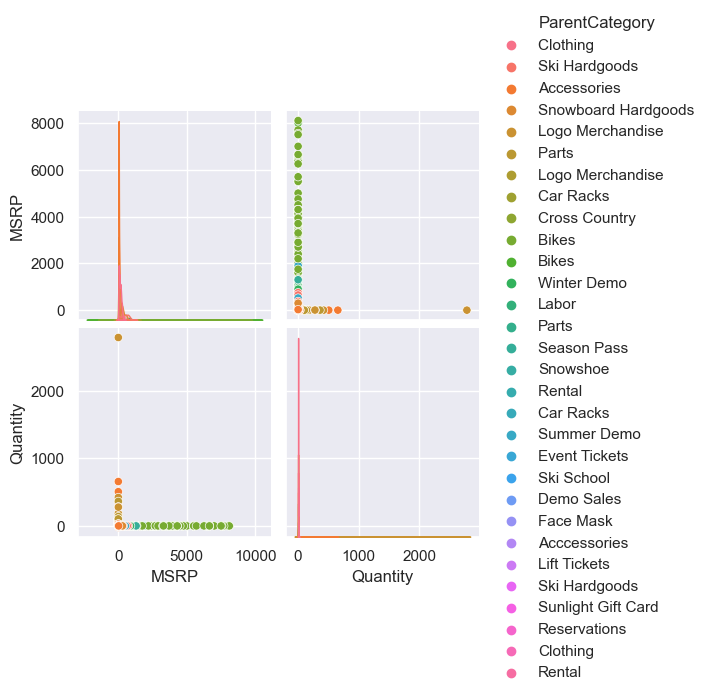

In [20]:
sns.pairplot(df_products, hue = 'ParentCategory')

In [21]:
df_products.to_csv('../data/processed/products.csv', index=False, encoding='utf-8')
dropped_products.to_csv('../data/processed/no-categories-products.csv', index=False, encoding='utf-8')

# 1.7 Summary<a id='1.7_Summary'></a>

In reviewing the data, there were 11 columns and 121,355 rows that I decided would be useful. For the time being, I dropped rows that had "nan" as a category as I believe that data is either old or messy. I will be focusing on the 121,355 product that have categories for this project and later I can look at the uncatetgorized products once I have a category classification scheme up and running. 

There are a number of missing category values for the products, which makes it hard to run reports and see which categories and types of products sell the best at the store. In order to update the categories to a new schema that will make reporting much more straightforward, it is necessary to view the pattern in the missing category data, as well as the accuracy in the category calssification. Are the products in the correct category? And can we fix it with automatic classification. Let's find out!